# Basics

_Jenny Kim, Phil Marshall_

In this notebook we demonstrate some of the basic functionality of the `SLRealizer` class, including:

* Reading in an `OM10` mock lens catalog and selecting a subsample of lenses to work on.

* Reading in an observation history, and setting up a list of `LensSystem` objects.

* Visualizing the `SLRealizer` model for a given lens system, showing the positions, sizes and brightnesses of lens galaxy and lensed quasars, at each epoch. 

### Requirements

You will need to have the `om10` package installed:
```
pip install om10
```

## Reading in the Lens Catalog and Observation History

First, we import OM10 and panda to read the data file.

In [3]:
import om10
import desc.slrealizer

Then, we import the `twincles_observation_history.csv` file to the variable named `obsHist`.

Next, we read in the lens system from the OM10 catalog. Let's choose one lens system from the db database. If you do not have `qso_mock.fits` file, you can download it here : [OM10 Repository](https://github.com/drphilmarshall/OM10/tree/master/data).

In [5]:
db = om10.DB(catalog='../../data/qso_mock.fits')
db.paint(synthetic=True)
realizer = desc.slrealizer.SLRealizer(lens = db, observation = "../../data/twinkles_observation_history.csv")

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems


## Visualizing a `LensSystem`

We will pick a lens from OM10 catalog and plot it on a random epoch. We can do this by first picking a lens manually and then passing that lens' ID to the `plot_random_lens_date` in the realizer class, just as the code below. This notebook does this for five times.

Populating the interactive namespace from numpy and matplotlib
OM10: Extracted OM10 lens number 7176527:
 LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------- -------- ---- ----- ... ------------- ------------- -------------
7176527        0    2 0.556 ...         20.15 20.1126048692 20.5967145903


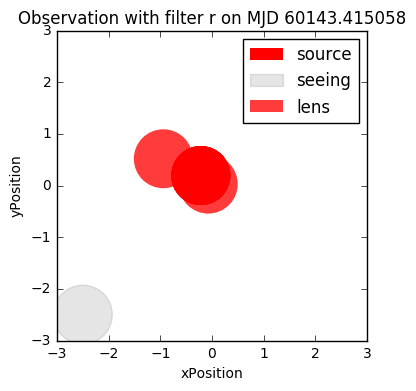

In [11]:
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)
realizer.plot_lens_random_date(lensID = 7176527)

OM10: Extracted OM10 lens number 7176527:
 LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------- -------- ---- ----- ... ------------- ------------- -------------
7176527        0    2 0.556 ...         20.15 20.1126048692 20.5967145903


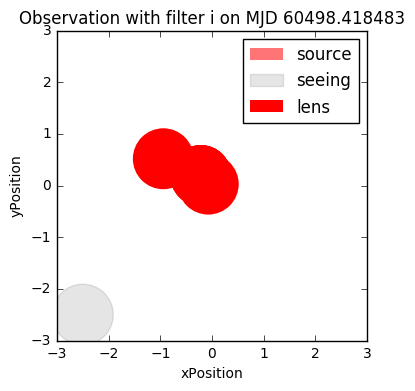

In [8]:
realizer.plot_lens_random_date(lensID = 7176527)

OM10: Extracted OM10 lens number 7176527:
 LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------- -------- ---- ----- ... ------------- ------------- -------------
7176527        0    2 0.556 ...         20.15 20.1126048692 20.5967145903


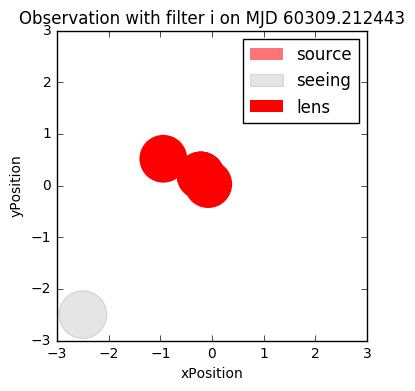

In [9]:
realizer.plot_lens_random_date(lensID = 7176527)

OM10: Extracted OM10 lens number 7176527:
 LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------- -------- ---- ----- ... ------------- ------------- -------------
7176527        0    2 0.556 ...         20.15 20.1126048692 20.5967145903


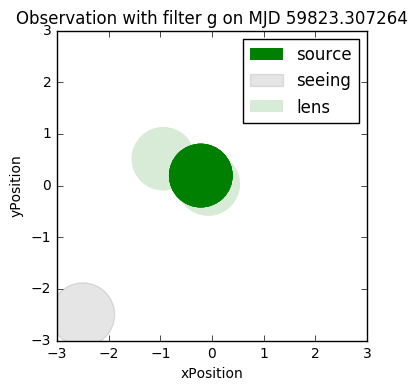

In [10]:
realizer.plot_lens_random_date(lensID = 7176527)